In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
dataset_path = '/kaggle/input/webmd-reviews-for-diabetes-drugs/'

reviews_file = dataset_path + 'diabetes_drug_webmd_reviews.csv'
df = pd.read_csv(reviews_file, index_col=0)

col_descripts_file = dataset_path + 'column_descriptions.csv'
col_descripts = pd.read_csv(col_descripts_file)

In [3]:
# description of columns

from pandas import option_context
from IPython.display import display

with option_context('display.max_colwidth', None, 'display.colheader_justify', 'left'):
    to_display = col_descripts.style.set_properties(**{'text-align': 'left'})
    display(to_display)

,column_name,description
0,drug_name,Name of medication being reviewed
1,date,Date of review
2,age,"Age group of patient, selected from a dropdown list"
3,gender,"Gender of patient, selected from a dropdown list"
4,time_on_drug,"How long the medication has been taken, selected from a dropdown list"
5,reviewer_type,"The type of person reviewing, patient or caregiver"
6,condition,"The ""main reason for taking this medication,"" selected from a dropdown list"
7,rating_overall,"Overall rating for the drug, the average of rating_effectiveness, rating_ease_of_use, and rating_satisfaction, from 1 to 5"
8,rating_effectiveness,"Agreement with the statement ""This drug has worked for me,"" from 1 to 5 stars"
9,rating_ease_of_use,"Agreement with the statement ""This medication has been easy for me to use,"" from 1 to 5 stars"


In [4]:
# total number of reviews available
len(df)

14084

In [5]:
# example of some of the records in the dataset
df.head(5)

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,Glipizide Oral,2/18/2024,65-74,Male,5 to less than 10 years,Patient,Type 2 Diabetes Mellitus,5.0,5,5,5,Used this to replace expensive JANUVIA. Work...
1,Glipizide Oral,1/29/2024,55-64,Female,NaN,Patient,Type 2 Diabetes Mellitus,5.0,5,5,5,I was taking Metformin which was causing sever...
2,Glipizide Oral,11/19/2023,65-74,Male,1 to 6 months,Patient,Type 2 Diabetes Mellitus,2.3,1,5,1,I was prescribed this after I had an allergic ...
3,Glipizide Oral,7/7/2022,45-54,Male,1 to 6 months,Patient,Type 2 Diabetes Mellitus,1.0,1,1,1,After I was prescribed Glipizide to take with ...
4,Glipizide Oral,4/1/2022,NaN,Male,1 to 6 months,Patient,Type 2 Diabetes Mellitus,2.3,1,4,2,Seem ok on first go then didn’t seem to work a...


In [6]:
# possible values for reviewer type: patient, caregiver, or empty
for x in pd.unique(df['reviewer_type']):
    print(x)

Patient
nan
Caregiver


In [ ]:
# count number of reviews for each drug - plot only the top n
fig, ax = plt.subplots(figsize=(15, 5))
n_top = 50
order = df['drug_name'].value_counts(ascending=False)[:50]
sns.countplot(df, x='drug_name', order=order.index)
plt.xticks(rotation=-45, ha='left')
ax.bar_label(container=ax.containers[0], labels=order, rotation=-90)
plt.title('Number of Reviews for Each Drug')
plt.ylim(0, 5500);

In [ ]:
# number of drugs with at least n reviews
counts = df['drug_name'].value_counts()
print(f'{np.sum(counts >= 100)} drugs with at least 100 reviews')
print(f'{np.sum(counts >= 50)} drugs with at least 50 reviews')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


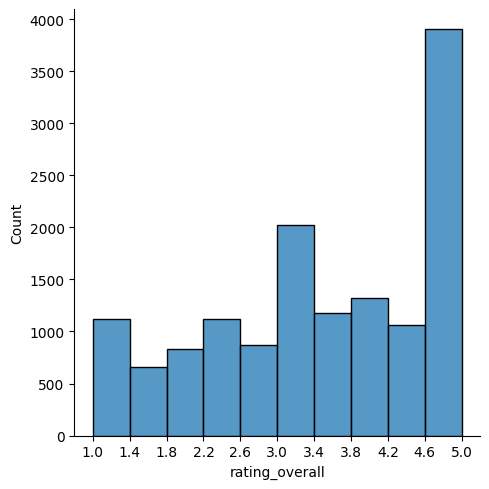

In [9]:
bins = 10
bin_width = (5-1)/bins
ax = sns.displot(df, x='rating_overall', bins=bins)
plt.xticks(np.arange(1, 5+bin_width, bin_width));

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


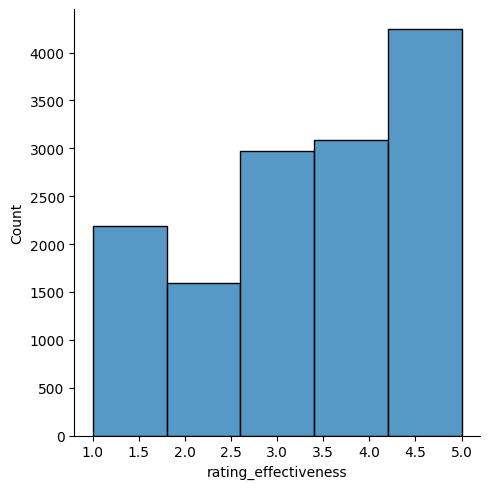

In [10]:
sns.displot(df, x='rating_effectiveness', bins=5);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


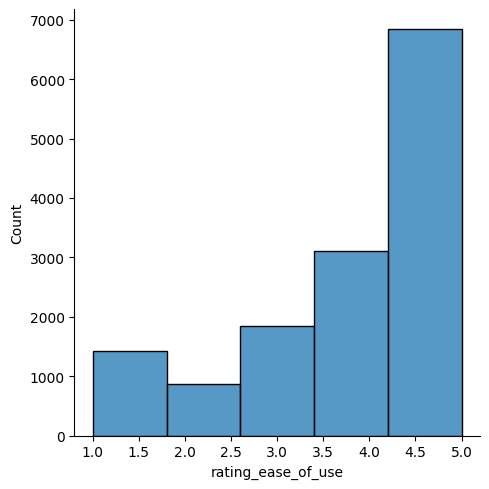

In [11]:
sns.displot(df, x='rating_ease_of_use', bins=5);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


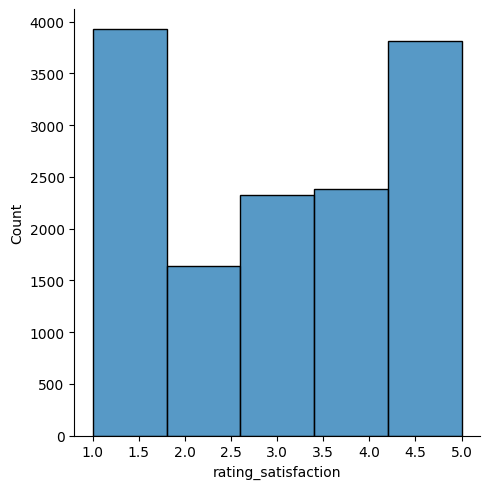

In [12]:
sns.displot(df, x='rating_satisfaction', bins=5)

<Axes: xlabel='age', ylabel='count'>

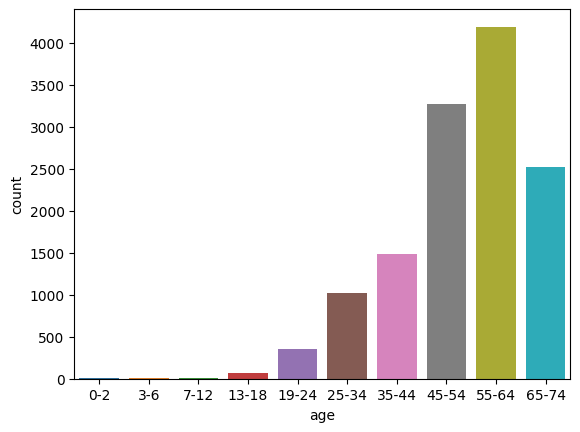

In [ ]:
vals = np.array([x for x in pd.unique(df['age']) if type(x)==str])
first_numbers = [int(x.split('-')[0]) for x in vals]
order_inds = np.argsort(first_numbers)
order = vals[order_inds]
sns.countplot(df, x='age', order=order)

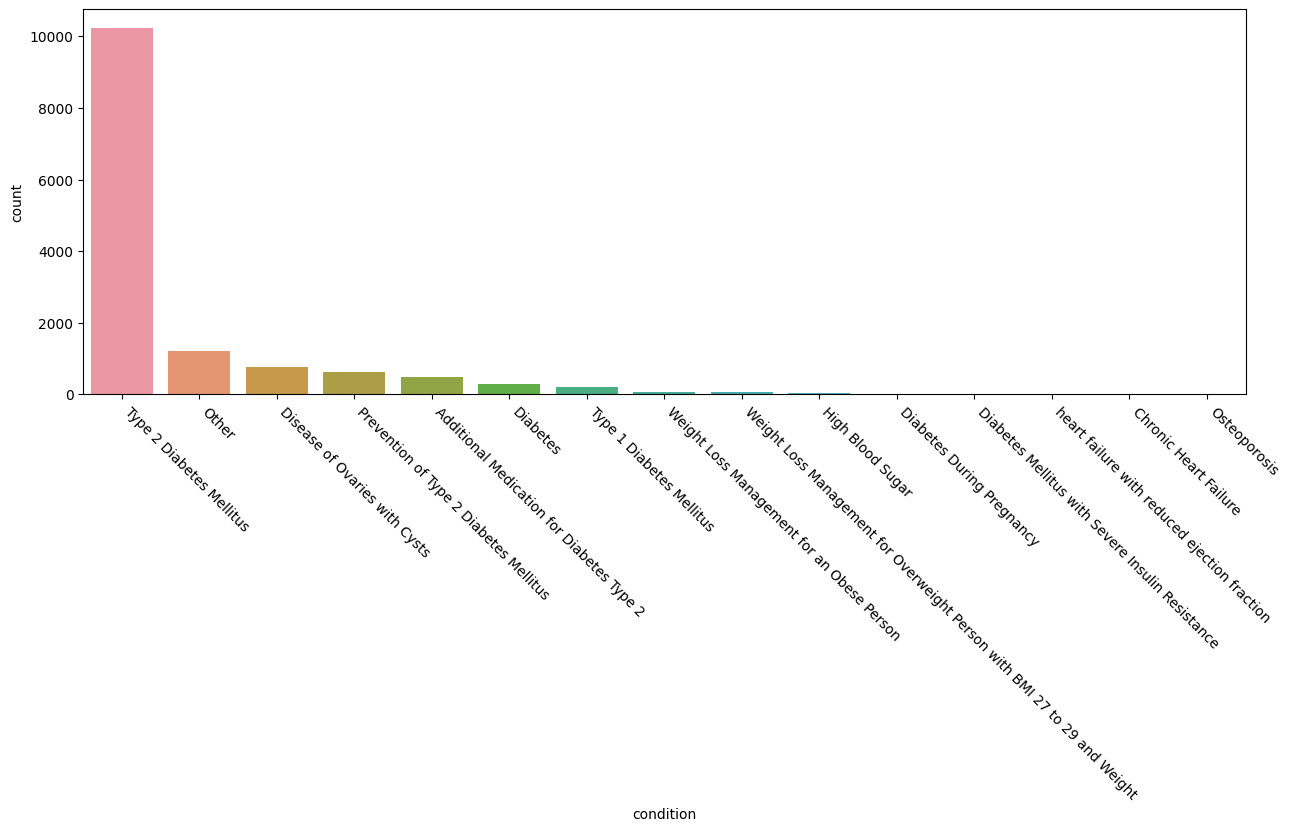

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
order = df['condition'].value_counts(ascending=False)
top_n = 15
top_conds = order[:top_n].index
sns.countplot(df[[x in top_conds for x in df['condition']]], x='condition', order=top_conds)
plt.xticks(rotation=-45, ha='left');

## Suggestions for Data Cleaning

In [ ]:
# identify entries with NAs and remove or interpolate values depending on the analysis that you are doing
df.isna().sum()

drug_name                  0
date                       0
age                     1143
gender                  1046
time_on_drug             668
reviewer_type            428
condition                  1
rating_overall             0
rating_effectiveness       0
rating_ease_of_use         0
rating_satisfaction        0
text                    1767
dtype: int64

In [ ]:
# inspect the records where patient is very young
# it is possible that some of these are user input errors
# but there are also entries where age, time on drug, and reviewer type are consistent
df[[x == '0-2' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
882,Metformin Oral,2/9/2013,0-2,Female,1 to less than 2 years,Patient,Type 2 Diabetes Mellitus,2.7,3,4,1,this medicine keeps me in the bathroom and i k...
2623,Metformin Oral,2/9/2013,0-2,Female,1 to less than 2 years,Patient,Type 2 Diabetes Mellitus,2.7,3,4,1,this medicine keeps me in the bathroom and i k...
4364,Metformin Oral,2/9/2013,0-2,Female,1 to less than 2 years,Patient,Type 2 Diabetes Mellitus,2.7,3,4,1,this medicine keeps me in the bathroom and i k...
6105,Metformin Oral,2/9/2013,0-2,Female,1 to less than 2 years,Patient,Type 2 Diabetes Mellitus,2.7,3,4,1,this medicine keeps me in the bathroom and i k...
10369,Trulicity Subcutaneous,6/1/2022,0-2,Female,1 to 6 months,Patient,Other,3.0,3,4,2,I was on Trulicity for 3 mos. I lost 10 lbs. I...
10377,Trulicity Subcutaneous,4/19/2022,0-2,Female,1 to 6 months,Patient,Type 2 Diabetes Mellitus,2.7,2,4,2,I had been losing weight steadily for the last...


In [ ]:
df[[x == '3-6' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
11760,Ozempic Subcutaneous,6/19/2022,3-6,Female,1 to 6 months,Patient,Other,4.3,4,5,4,Switched from Wegovy due to supply problems ma...
11963,Admelog U-100 Insulin Lispro Subcutaneous,12/12/2018,3-6,Female,less than 1 month,Patient,Diabetes,1.0,1,1,1,This insulin is garbage. Our daughter (kinderg...
12759,Lantus U-100 Insulin Subcutaneous,2/10/2016,3-6,NaN,2 to less than 5 years,Patient,Type 2 Diabetes Mellitus,4.0,4,4,4,"Actually, I have a question about this drug. ..."
13818,Apidra U-100 Insulin Subcutaneous,5/2/2015,3-6,Male,less than 1 month,Caregiver,Type 1 Diabetes Mellitus,1.0,1,1,1,My 3 year old son was taking Novolog for the l...


In [ ]:
# drop NAs

In [ ]:
# identify nonsense reviews - for example, discard reviews where > a certain percentage of words are misspelled